In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car_name"]
data =  pd.read_csv('auto-mpg.data', sep="\s+", names=names)
# data

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [3]:
X, y = data.iloc[:, 1:-1], data.iloc[:, 0]

We don't care about the names of the cars

Imputation ways:
1. Filling the missing data with the mean or median value if it’s a numerical variable.
2. Filling the missing data with mode if it’s a categorical value.
3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
4. Filling the categorical value with a new type for the missing values.
5. Filling with a Regression Model
5. Filling with a KNN Model

I'll use Regression Model:
In this case, the null values in one column are filled by fitting a regression model using other columns in the dataset.

In [4]:
X = X.replace('?', np.NaN)
# X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    392 non-null    object 
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


Just the third column contains null values

In [5]:
def impute(column):
    lr = LinearRegression()

    unknown_data = X[X[column].isnull()==True]
    known_data = X[X[column].isnull()==False]

    known_y = known_data[column]
    known_X = known_data.drop(column,axis=1)

    lr.fit(known_X,known_y)

    unknown_X = unknown_data.drop(column,axis=1)
    # unknown_X

    pred = lr.predict(unknown_X)
    # pred

    unknown_X[column]= pred
    
    return unknown_X

In [6]:
unknown_X = impute('horsepower')
# unknown_X.index

In [7]:
X.loc[unknown_X.index, 'horsepower'] = unknown_X['horsepower']
# X.info()

The column horsepower had null values and because of that its type is object. In order to plot this column the type has to be changed to float

In [8]:
X = X.astype(float)

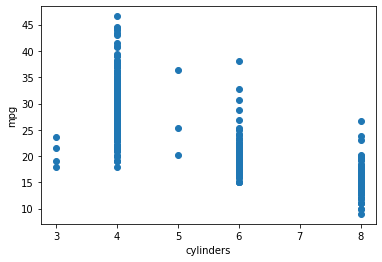

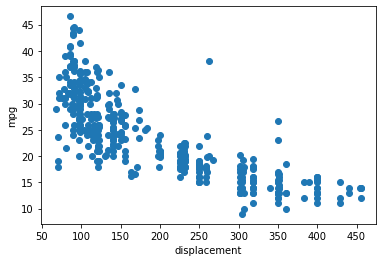

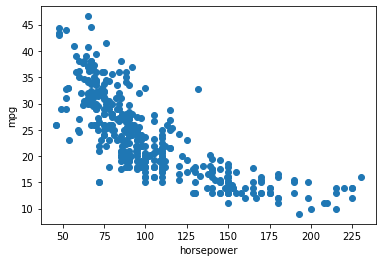

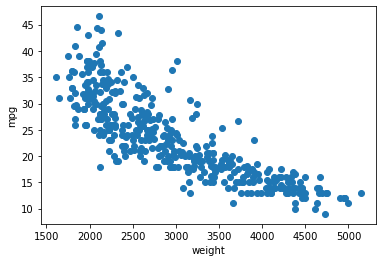

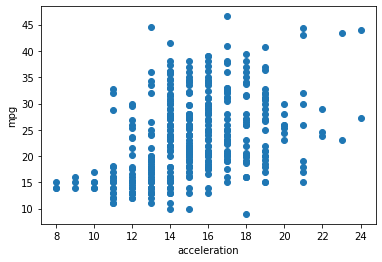

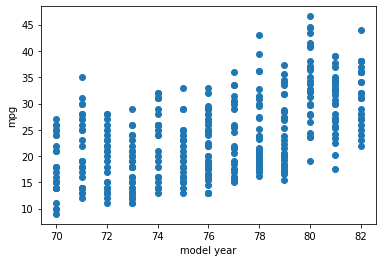

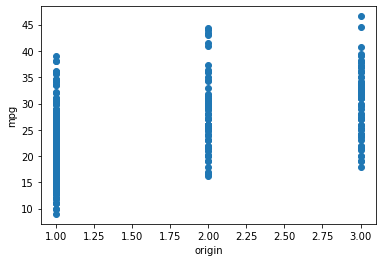

In [10]:
for name in X.columns:
    plt.scatter(np.int64(X[name]), y)
    plt.xlabel(name)
    plt.ylabel('mpg')
    plt.savefig(name)
    plt.show()

In [10]:
X = StandardScaler().fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def evaluate(y, y_pred):
    print('mean squared error = ', mean_squared_error(y, y_pred))
    plt.scatter(y, y_pred)
    plt.xlabel('train')
    plt.ylabel('prediction')
    plt.tight_layout()
    plt.show()